<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Весна 2021</b></h3>

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания: 
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить в соревнование на [kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/) (максимум 5 баллов). За прохождение определенного порогов будут начисляться баллы.


**Обе части будут проверяться в формате peer-review. Т.е. вашу посылку на степик будут проверять несколько других студентов и аггрегация их оценок будет выставлена. В то же время вам тоже нужно будет проверить несколько других учеников.**

**Пожалуйста, делайте свою работу чистой и понятной, чтобы облегчить проверку. Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме или в лс @runfme. Если вы захотите проаппелировать оценку, то пипшите в лс @runfme.**

**Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое - дерзайте!**

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров другого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [128]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [129]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [130]:
data = pd.read_csv('./train.csv')

In [131]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [132]:
# YOUR CODE
data = data.replace(' ', np.nan)
data.isna().sum(axis=0)

ClientPeriod                0
MonthlySpending             0
TotalSpent                  9
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

In [133]:
numeric = data[num_cols]
categorial = data[cat_cols]
numeric['TotalSpent'] = numeric['TotalSpent'].astype(np.float64)

C:\Users\saenk\AppData\Local\Temp\ipykernel_49912\1195597433.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric['TotalSpent'] = numeric['TotalSpent'].astype(np.float64)


In [134]:
numeric = numeric.replace(' ', np.nan)
print(numeric.isna().any())


ClientPeriod       False
MonthlySpending    False
TotalSpent          True
dtype: bool


In [135]:
categorial = categorial.replace(' ', np.nan)
print(categorial.isna().any())


Sex                         False
IsSeniorCitizen             False
HasPartner                  False
HasChild                    False
HasPhoneService             False
HasMultiplePhoneNumbers     False
HasInternetService          False
HasOnlineSecurityService    False
HasOnlineBackup             False
HasDeviceProtection         False
HasTechSupportAccess        False
HasOnlineTV                 False
HasMovieSubscription        False
HasContractPhone            False
IsBillingPaperless          False
PaymentMethod               False
dtype: bool


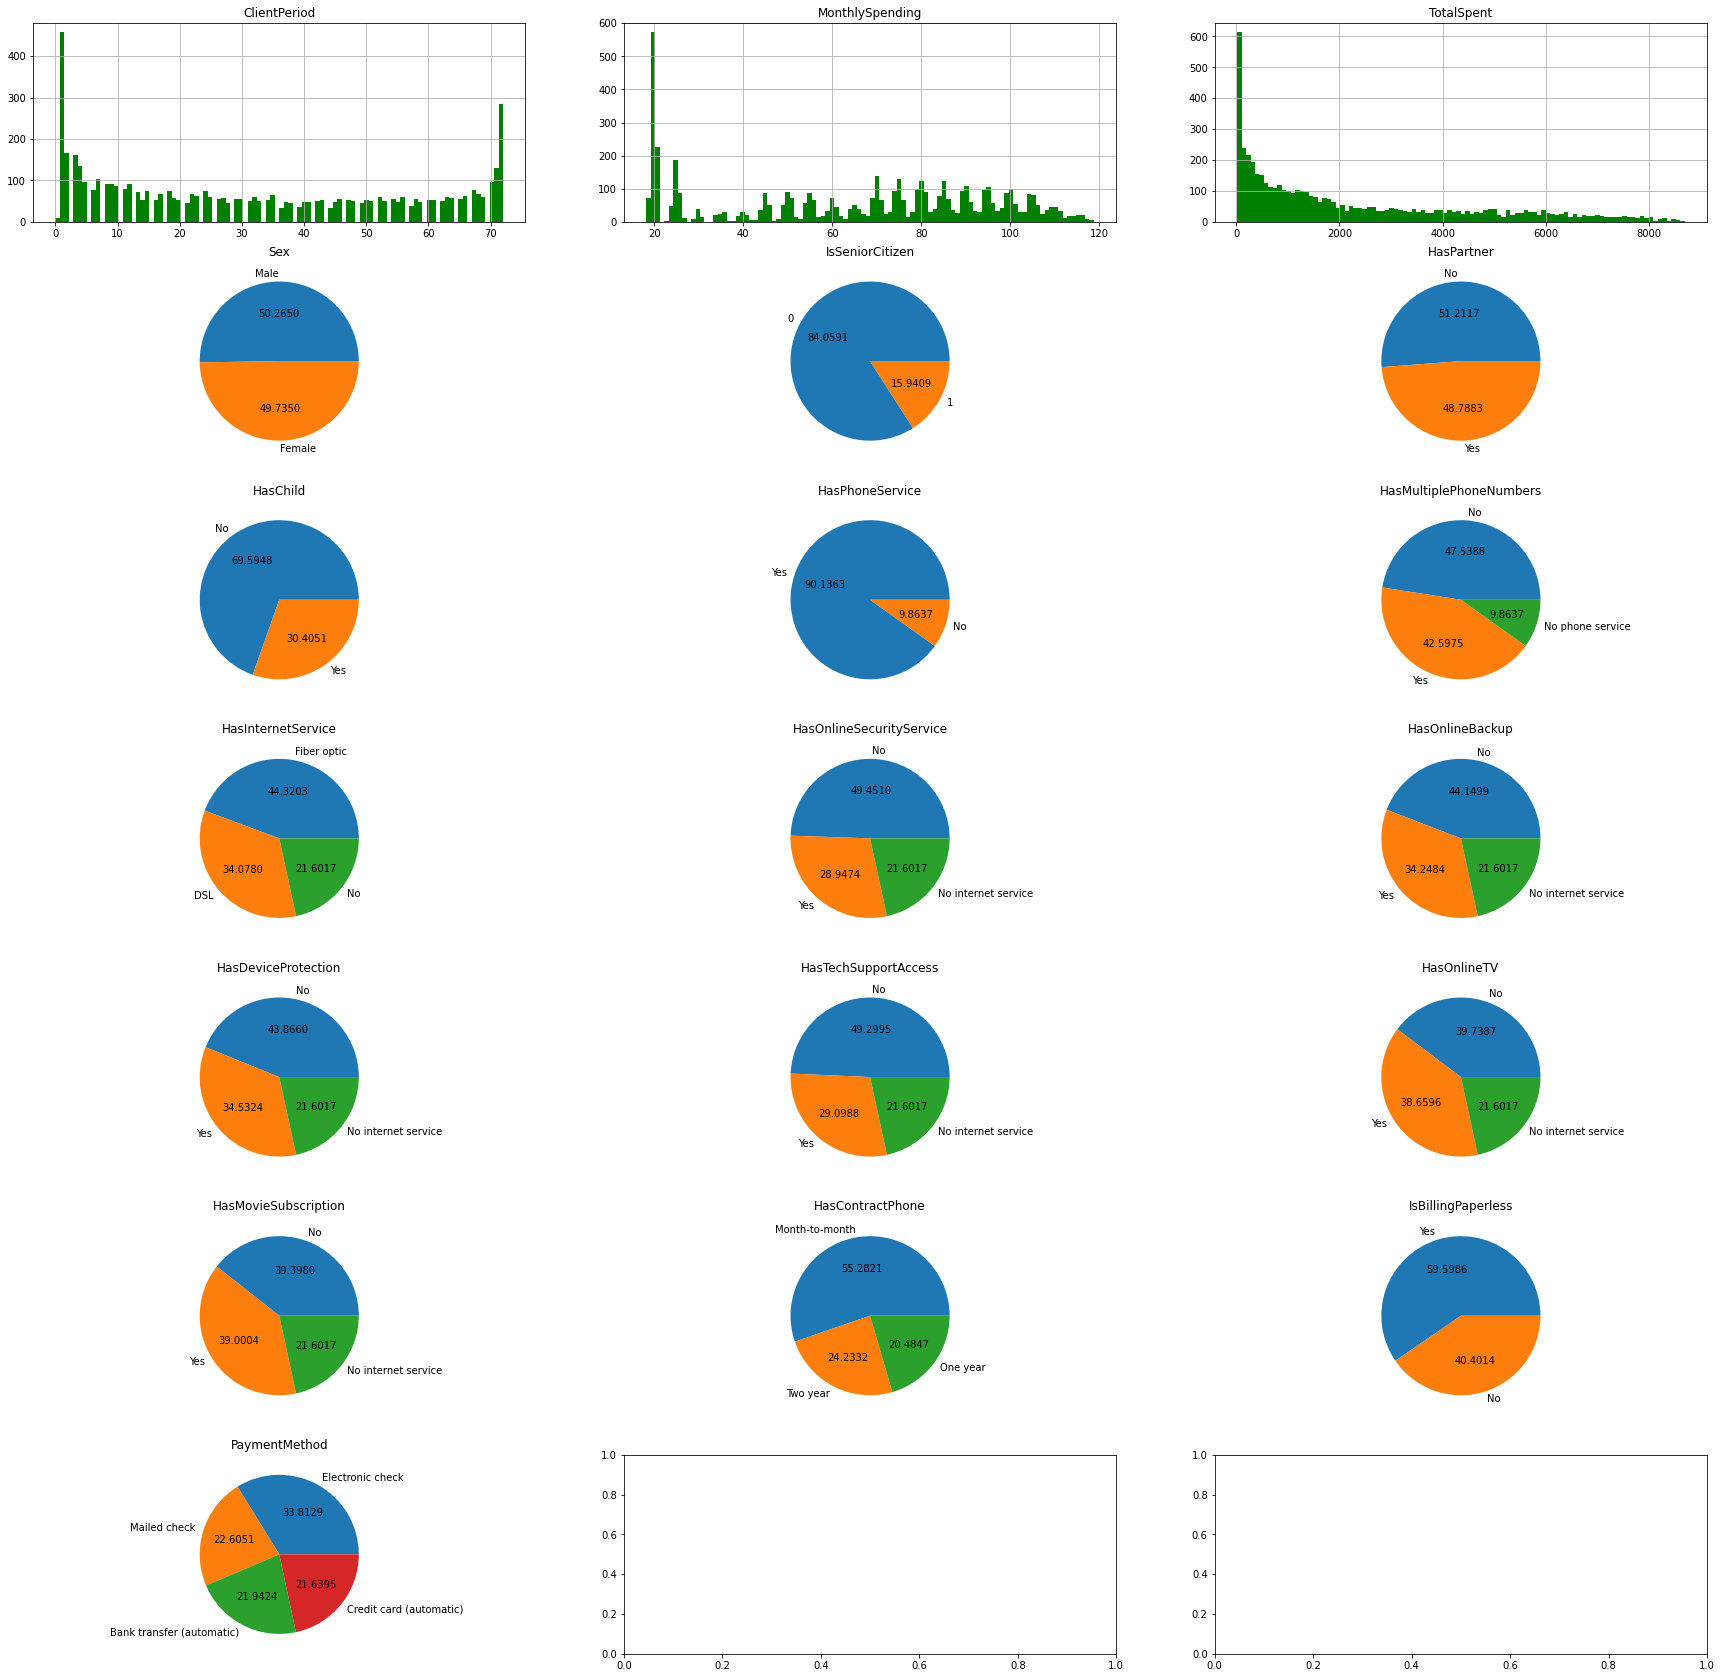

In [136]:
# YOUR CODE
fig, ax = plt.subplots(7, 3, figsize=(30, 30))
ax = ax.ravel()
# plt.hist()
x = np.arange(numeric.shape[0])
for i, j in enumerate(numeric.keys()):
    # print(numeric[j].values)
    # print(numeric.value_counts())
    out = ax[i].hist(numeric[j].values, 100, facecolor='g')
    ax[i].set_title(j)
    ax[i].grid(True)
fig, ax = plt.subplots(7, 3, figsize=(30, 30))
ax = ax.ravel()
for i, j in enumerate(categorial):
    # print(numeric[j].values)
    # print(numeric.value_counts())
    out = ax[i + 3].pie(categorial[j].value_counts(), labels = categorial[j].value_counts().keys(), autopct='%.4f')
    ax[i + 3].set_title(j)
plt.show()

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

In [137]:
# YOUR CODE
# categorial = pd.get_dummies(categorial)
X = pd.concat([numeric, categorial, data[target_col]], axis=1)
X = X.dropna()

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [138]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

In [139]:
X_train, X_valid, y_train, y_valid = train_test_split(X.iloc[:, :-1], X.iloc[:, -1], train_size=0.8)

Fitting 5 folds for each of 11 candidates, totalling 55 fits


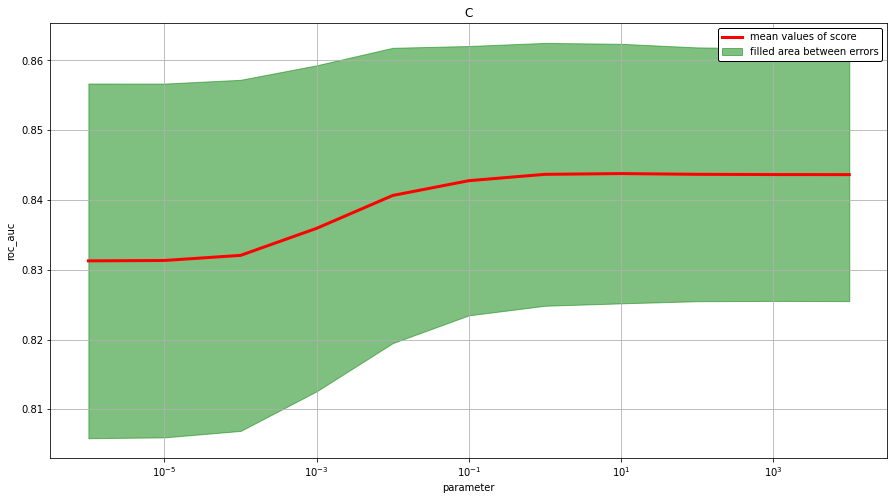

In [140]:
# YOUR CODE
from sklearn.compose import ColumnTransformer

pipe = make_pipeline(
    ColumnTransformer(
        [('onehot', OneHotEncoder(), cat_cols),
         ('Scaler', StandardScaler(), num_cols)],
    ),
    LogisticRegression(),
)
grid = np.logspace(4, -6, num=11, base=10)
CV_model = GridSearchCV(
    estimator=pipe,
    param_grid={"logisticregression__C": grid},
    scoring='roc_auc',
    n_jobs=8,
    verbose=10,
    cv=5
)
CV_model.fit(X_train, y_train)
means = CV_model.cv_results_['mean_test_score']
error = CV_model.cv_results_['std_test_score']
plt.figure(figsize=(15, 8))
plt.title("C")
plt.xscale('log')
plt.plot(grid, means, label='mean values of score', color='red', lw=3)
plt.fill_between(grid, means - 2 * error, means + 2 * error,
                 color='green', label='filled area between errors', alpha=0.5)
legend_box = plt.legend(framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.xlabel('parameter')
plt.ylabel('roc_auc')
plt.grid(True)
plt.show()


In [141]:
roc_auc_score(y_valid, CV_model.predict_proba(X_valid)[:, 1])

0.8514068627450981

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

10

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

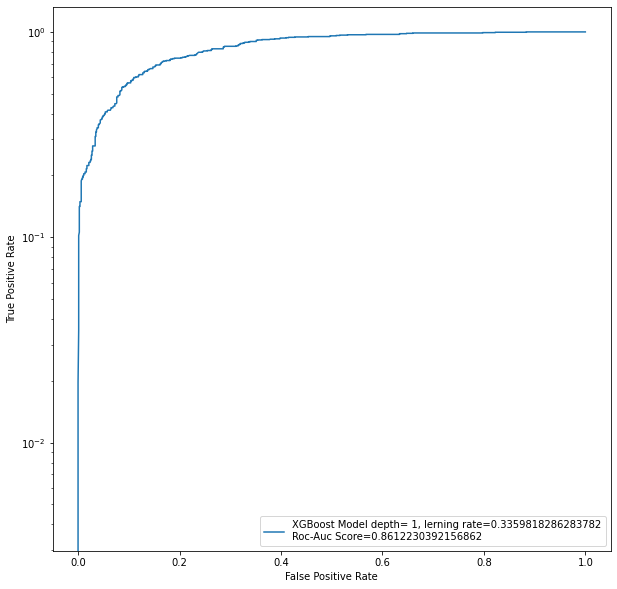

In [151]:
# YOUR CODE
import xgboost
from sklearn.metrics import roc_curve
depth = np.arange(1, 10)
lr = np.logspace(0, -3, num=20, base=10)
ax = plt.figure(figsize=(10, 10))
winner = (0, 0)
for i_num, i in enumerate(depth):
    for j_num, j in enumerate(lr):
        xgboost_model = xgboost.XGBClassifier(
            max_depth=i, 
            learning_rate=j, 
            n_estimators=284,
        )
        pipe = ColumnTransformer(
                [('onehot', OneHotEncoder(), cat_cols),
                ('Scaler', StandardScaler(), num_cols)],
            )
        X_train_xgboost = pipe.fit_transform(X_train)
        xgboost_model.fit(X_train_xgboost, y_train)
        X_valid_xgboost = pipe.transform(X_valid)
        pred = xgboost_model.predict_proba(X_valid_xgboost)[:, 1]
        perc = roc_auc_score(y_valid, pred)
        winner = max(winner, (perc, xgboost_model))
        # print(perc)
xgboost_model = winner[1]
pred = xgboost_model.predict_proba(X_valid_xgboost)[:, 1]
cb_fpr, cb_tpr, _ = roc_curve(y_valid, pred)
plt.plot(cb_fpr, cb_tpr, linestyle='-', label=f'XGBoost Model depth= {xgboost_model.get_params()["max_depth"]}, lerning rate={xgboost_model.get_params()["learning_rate"]}\nRoc-Auc Score={roc_auc_score(y_valid, pred)}')
plt.yscale('log')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [152]:
params = xgboost_model.get_params() 

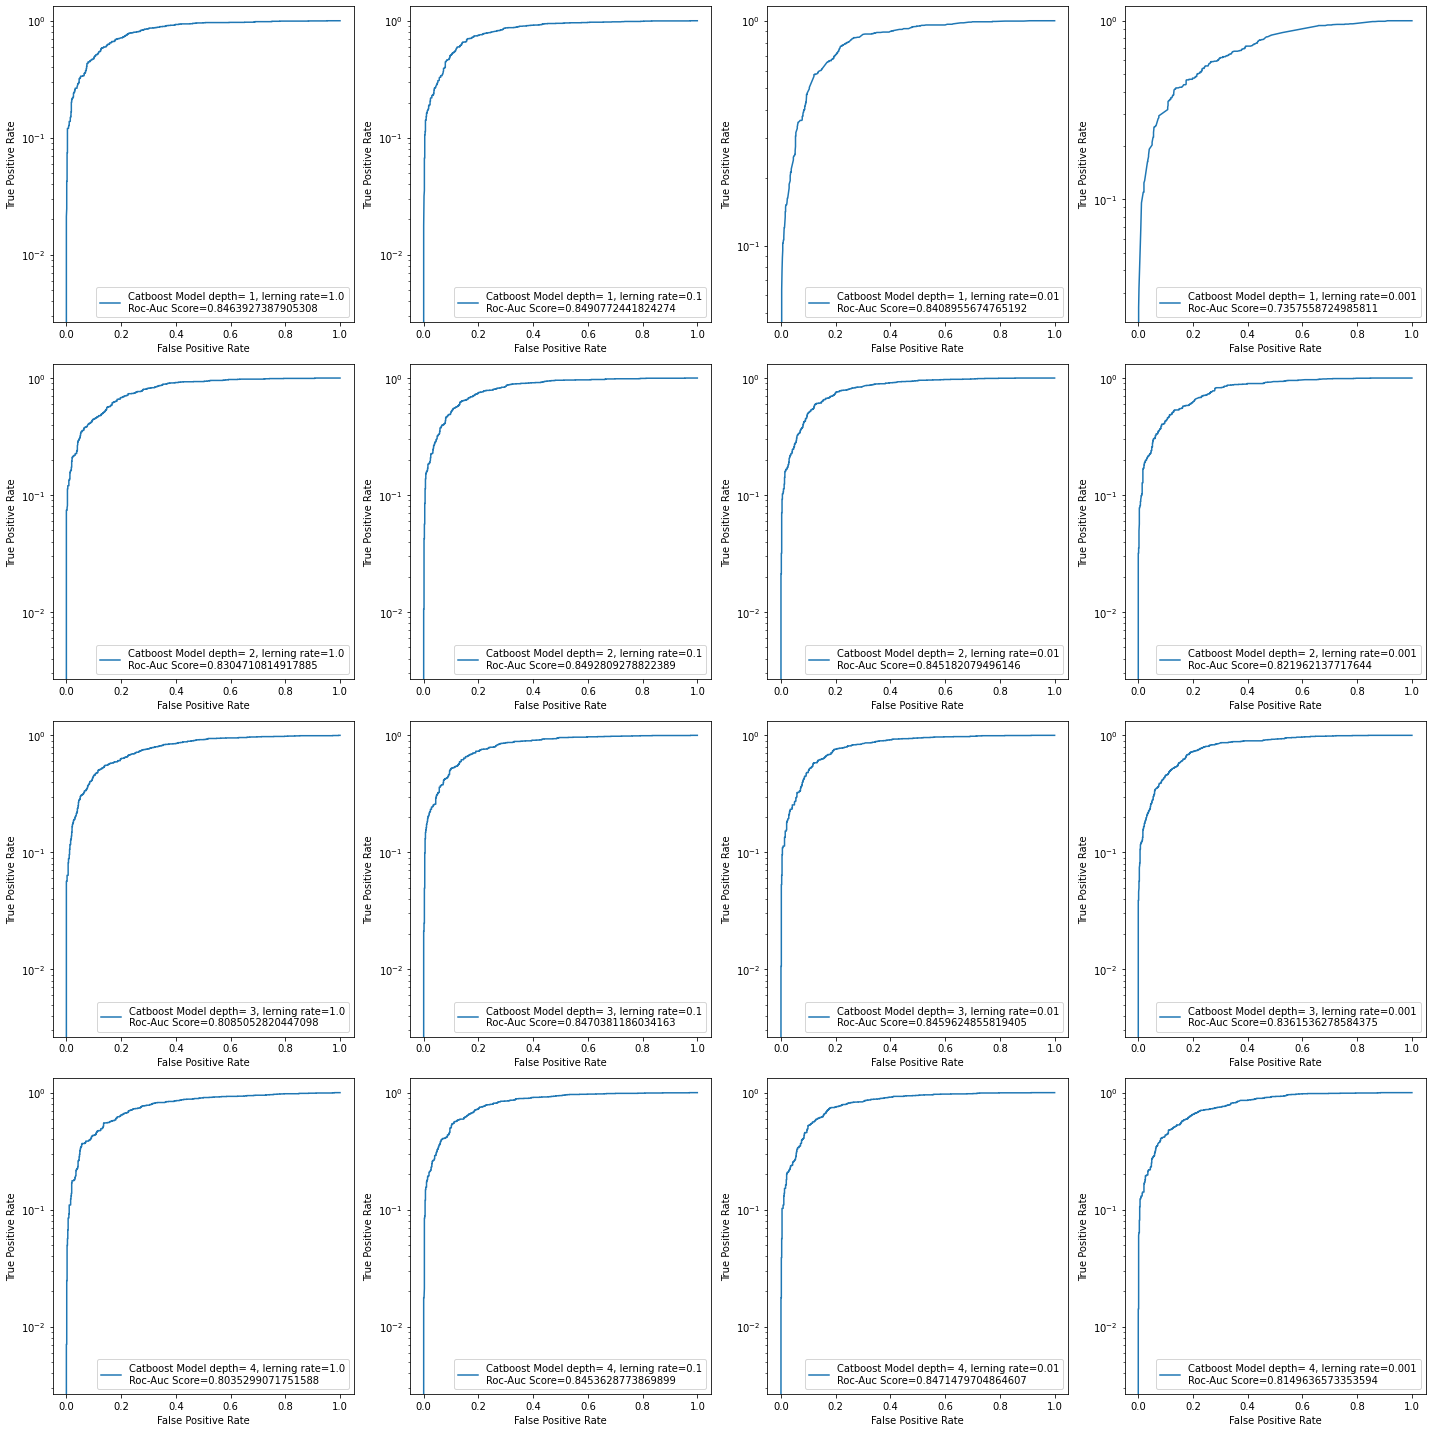

In [61]:
# YOUR CODE
import catboost
from sklearn.metrics import roc_curve
depth = np.arange(1, 5)
lr = np.logspace(0, -3, num=4, base=10)
fig, ax = plt.subplots(4, 4, figsize=(20, 20))
for i_num, i in enumerate(depth):
    for j_num, j in enumerate(lr):
        catboost_model = catboost.CatBoostClassifier(
            cat_features=cat_cols,
            depth=i,
            learning_rate=j,
            n_estimators=284,
        )
        catboost_model.fit(X_train, y_train, logging_level='Silent')
        pred = catboost_model.predict_proba(X_valid)[:, 1]
        # roc_auc_score(y_valid, catboost_model.predict_proba(X_valid)[:, 1])
        cb_fpr, cb_tpr, _ = roc_curve(y_valid, pred)
        ax[i_num, j_num].plot(cb_fpr, cb_tpr, linestyle='-', label=f'Catboost Model depth= {i}, lerning rate={j}\nRoc-Auc Score={roc_auc_score(y_valid, pred)}')
        ax[i_num, j_num].set_yscale('log')
        ax[i_num, j_num].set_xlabel('False Positive Rate')
        ax[i_num, j_num].set_ylabel('True Positive Rate')
        # ax[i_num, j_num].text(0.5, 10**-2, f"")
        ax[i_num, j_num].legend()
        fig.tight_layout()


Выпишите какое лучшее качество и с какими параметрами вам удалось получить

0.85, depth = 4, learning rate = 0.01

# Предсказания

In [153]:
# params = {
#     "depth": 4,
#     "learning_rate": 0.01,
#     'n_estimators': 284,
#     'silent': True,
# }
#Для проверки
# params = {
#     'n_estimators': 284,
#     'max_depth': 4,
#     'eta': 0.04356020658096416,
#     'grow_policy': 'lossguide',
# }
# print(X.iloc[:, :-1].dtypes)
best_model = xgboost.XGBClassifier(**params)
X_full = pipe.fit_transform(X.iloc[:, :-1])
best_model.fit(X_full, X.iloc[:, -1])
pass


In [154]:
X_test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv', index_col='Id')
X_test.dtypes
X_test.replace(' ', '1', inplace=True)
X_test['TotalSpent'] = X_test['TotalSpent'].astype(np.float64)
X_test['TotalSpent'].fillna(X_test['TotalSpent'].mean(), inplace=True)
X_test = pipe.transform(X_test)
submission['Churn'] = best_model.predict_proba(X_test)[:, 1]
submission.to_csv('./my_submission.csv')

In [105]:
# X_test = pd.read_csv('./test.csv')
# submission = pd.read_csv('./submission.csv', index_col='Id')
# X_test.dtypes
# X_test.replace(' ', '1', inplace=True)
# X_test['TotalSpent'] = X_test['TotalSpent'].astype(np.float64)
# X_test['TotalSpent'].fillna(X_test['TotalSpent'].mean(), inplace=True)
# submission['Churn'] = best_model.predict_proba(X_test)[:, 1]
# submission.to_csv('./my_submission.csv')

In [155]:
params

{'objective': 'binary:logistic',
 'use_label_encoder': False,
 'base_score': 0.5,
 'booster': 'gbtree',
 'callbacks': None,
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'gamma': 0,
 'gpu_id': -1,
 'grow_policy': 'depthwise',
 'importance_type': None,
 'interaction_constraints': '',
 'learning_rate': 0.3359818286283782,
 'max_bin': 256,
 'max_cat_to_onehot': 4,
 'max_delta_step': 0,
 'max_depth': 1,
 'max_leaves': 0,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 0,
 'num_parallel_tree': 1,
 'predictor': 'auto',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'sampling_method': 'uniform',
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None}

# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.